# Welcome to Jupyter!

In [2]:
conda install -c anaconda pandas-datareader 

Solving environment: done

## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    libxslt-1.1.33             |       h31b3aaa_0         556 KB  conda-forge
    lxml-4.6.2                 |   py36h04a5ba7_1         1.5 MB  conda-forge
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    pandas-datareader-0.9.0    |             py_0          72 KB  anaconda
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  libxslt            conda-forge/linux-64::libxslt-1.1.33-h31b3aaa_0
  lxm

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [64]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'DAL']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2014-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('KO', 'yahoo', start_date, end_date)
panel_data.reset_index(inplace=True)
panel_data['50dayEWM'] = panel_data['Adj Close'].ewm(span=50).mean()
panel_data['150dayEWM'] = panel_data['Adj Close'].ewm(span=150, adjust=False).mean()
panel_data['300dayEWM'] = panel_data['Adj Close'].ewm(span=300, adjust=False).mean()

In [65]:
print(panel_data.tail())

           Date       High        Low       Open      Close     Volume  \
1253 2014-12-24  43.230000  42.919998  43.099998  42.939999  6405900.0   
1254 2014-12-26  43.299999  42.930000  42.970001  42.959999  6466900.0   
1255 2014-12-29  43.060001  42.490002  42.799999  42.860001  8694500.0   
1256 2014-12-30  42.990002  42.650002  42.740002  42.759998  9222000.0   
1257 2014-12-31  42.939999  42.220001  42.919998  42.220001  9369500.0   

      Adj Close   50dayEWM  150dayEWM  300dayEWM  
1253  35.275059  34.815968  34.035627  33.072705  
1254  35.291485  34.834616  34.052261  33.087448  
1255  35.209335  34.849311  34.067586  33.101547  
1256  35.127186  34.860208  34.081621  33.115006  
1257  34.683590  34.853281  34.089594  33.125429  


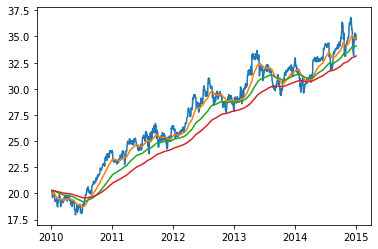

In [66]:
x = panel_data["Date"]
y = panel_data["Adj Close"]
y2 = panel_data["50dayEWM"]
y3 = panel_data["150dayEWM"]
y4 = panel_data["300dayEWM"]


plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.show()

In [67]:
panel_data.to_csv("KO.csv", index=False)